In [84]:
from os import listdir
from os.path import isfile, join

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.applications import ResNet50
import random

path = 'curated/'

In [106]:
characters_string = ['!', '"', "'", '(', ')', ',', '-', '.', '0', '1', '2', '3', 
              '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 
              'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 
              'Z', '^', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
              'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
characters_simple = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
             #        , 'A', 'B', 'C', 'D', 'E', 'F', 
             # 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 
             # 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
             # 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
characters = [ord(i) for i in characters_simple]
print(characters_simple)
print(characters)
N_classes = len(characters)
ascii_to_class = dict(zip(characters, list(range(N_classes))))
print(ascii_to_class)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
[48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
{48: 0, 49: 1, 50: 2, 51: 3, 52: 4, 53: 5, 54: 6, 55: 7, 56: 8, 57: 9}


In [107]:
### LOAD DATASET

X = []
y = []
for i in characters:
    path_img = path + str(i) + '/'
    for file_name in [f for f in listdir(path_img) if isfile(join(path_img, f))]:
        img = mpimg.imread(path_img + file_name,"png")
        X += [img.reshape(64,64,1)]
        y += [i]

In [108]:
#f = lambda x: x-33 if x < 92 else x-34
#f_inv = lambda x: x+33 if x < 59 else x+34
X = np.array(X, dtype=np.uint8)
#y = np.array(y, dtype=np.uint8)
y = np.array([ascii_to_class[y[i]] for i in range(len(y))], dtype=np.uint8)
print(X.shape)
print(y.shape)
print(min(y),max(y))
print(len(set(y)))

(10305, 64, 64, 1)
(10305,)
0 9
10


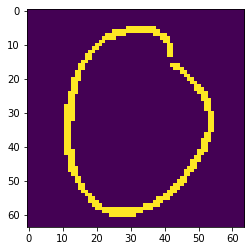

In [109]:
plt.imshow(X[0])
plt.show()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)
X_train, X_test = X_train.astype('float32')/255, X_test.astype('float32')/255
y_train, y_test = to_categorical(y_train,N_classes), to_categorical(y_test,N_classes)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (8244, 64, 64, 1)
X_test shape:  (2061, 64, 64, 1)
y_train shape:  (8244, 10)
y_test shape:  (2061, 10)


index  3896
Label:  4


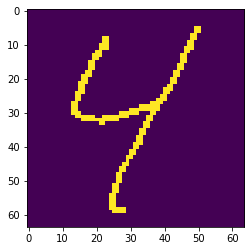

In [111]:
def get_key(dct,val):
    for key, value in dct.items():
         if val == value: 
            return key
    return None

t = random.randint(0,10000)
print("index ",t)
plt.imshow(X_train[t])
print("Label: ", chr(get_key(ascii_to_class,np.argmax(y_train[t]))))

In [118]:
def Model_base(input_shape: tuple, num_classes: int):
    
    model = tf.keras.Sequential()
    model.add(Conv2D(64, (3,3), padding="same", input_shape=input_shape))
    model.add(keras.layers.ReLU())
    model.add(Conv2D(128, (3,3), padding="valid"))
    model.add(keras.layers.ReLU())
    model.add(Dropout(.25))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(.25))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

def Model_2():
    EPOCHS = 10
    opt = SGD(lr=1e-1, decay=1e-1 / EPOCHS)
    model = ResNet50()
    model.build(32, 32, 1, 93, (3, 3, 3), (64, 64, 128, 256))
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model

def Model(input_shape: tuple, num_classes: int):
    """
    model = tf.keras.Sequential()
    model.add(Conv2D(64, (3,3), padding="same", input_shape=input_shape))
    model.add(keras.layers.ReLU())
    model.add(Conv2D(64, (3,3), padding="valid"))
    model.add(keras.layers.ReLU())
    model.add(Dropout(.25))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(128, (3,3), padding="valid"))
    model.add(keras.layers.ReLU())
    model.add(Conv2D(128, (3,3), padding="valid"))
    model.add(keras.layers.ReLU())
    model.add(Dropout(.25))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(.25))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])"""
    
    
    model = keras.models.Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Dropout(0.25))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
 
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    sgd = SGD(lr=0.1, decay=1.0e-6)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    
    return model

In [119]:
model = Model(X_train.shape[1:], y_train.shape[1])

In [123]:
def train(model, x: np.array, y: np.array,
                x_test: np.array, y_test: np.array,
                batch_size: int = 32, epochs: int = 10):
    e_stop = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=2)
    #model.fit(x, y, batch_size=batch_size, epochs=epochs, callbacks=[e_stop], validation_data=(x_test, y_test))
    model.fit(x, y, batch_size=batch_size, epochs=2, callbacks=[e_stop], validation_data=(x_test, y_test))
    loss, accuracy = model.evaluate(x_test, y_test)

In [124]:
train(model,X_train,y_train,X_test,y_test,128,2)

Epoch 1/2
21/65 [========>.....................] - ETA: 22s - loss: 2.9376 - accuracy: 0.1060

KeyboardInterrupt: 